In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os

plt.style.use("ggplot")  # Menggunakan gaya ggplot
%matplotlib inline

In [6]:
# Membangun jalur file secara dinamis
file_path = os.path.join("WorldHappiness_Corruption_2015_2020.csv")

# Mengimpor dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dan informasi dataset
print(df.head())
print(df.info())

       Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  

In [10]:
# Menampilkan bentuk dataset
print(f"Bentuk dataset ini adalah {df.shape}.")

# Menampilkan informasi tipe data dan jumlah nilai non-null
df.info()

Bentuk dataset ini adalah (792, 13).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [15]:
# Memeriksa nilai null
df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [17]:
#Memeriksa nilai duplikat
df.duplicated().sum()

np.int64(0)

In [26]:
#mendeskripsikan dataset
df.describe().round(1)

happiness_score  gdp_per_capita  family  health  freedom  generosity  \
count            792.0           792.0   792.0   792.0    792.0       792.0   
mean               5.5             0.9     0.5     0.6      0.4         0.2   
std                1.1             0.4     0.6     0.2      0.1         0.1   
min                2.6             0.0     0.0     0.0      0.0         0.0   
25%                4.6             0.6     0.0     0.5      0.3         0.1   
50%                5.5             1.0     0.0     0.7      0.4         0.2   
75%                6.3             1.2     1.0     0.8      0.5         0.3   
max                7.8             2.1     1.6     1.1      0.7         0.8   

       government_trust  dystopia_residual    Year  social_support  cpi_score  
count             792.0              792.0   792.0           792.0      792.0  
mean                0.1                1.4  2017.5             0.6       44.3  
std                 0.1                1.1     1.7             0.6       19.5  
min                 0.0                0.0  2015.0             0.0       11.0  
25%                 0.1                0.0  2016.0             0.0       30.0  
50%                 0.1                1.7  2017.5             0.2       38.0  
75%                 0.2                2.2  2019.0             1.3       57.0  
max                 0.6                3.6  2020.0             1.6       91.0

In [32]:
# periksa nilai unik di kolom Negara
df["Country"].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Argentina', 'Mexico',
       'Singapore', 'Malta', 'Guatemala', 'Uruguay', 'Panama', 'France',
       'Thailand', 'Spain', 'Colombia', 'Saudi Arabia', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Japan',
       'Lithuania', 'Algeria', 'Latvia', 'Moldova', 'Romania', 'Bolivia',
       'Turkmenistan', 'Kazakhstan', 'Slovenia', 'Peru', 'Mauritius',
       'Cyprus', 'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Philippines', 'Serbia', 'Jordan', 'Hungary', 'Jamaica', 'Croatia',
       'Kosovo', 'China', 'Pakistan', 'Indonesia', 'Venezuela',
       'Montenegro', 'Morocco

In [34]:
#Berapa negara yang kita miliki?
print("Negara  = {} ".format(df["Country"].nunique()))

Negara  = 132 


Text(0.5, 1.0, 'Skor kebahagiaan rata-rata dalam 5 tahun')

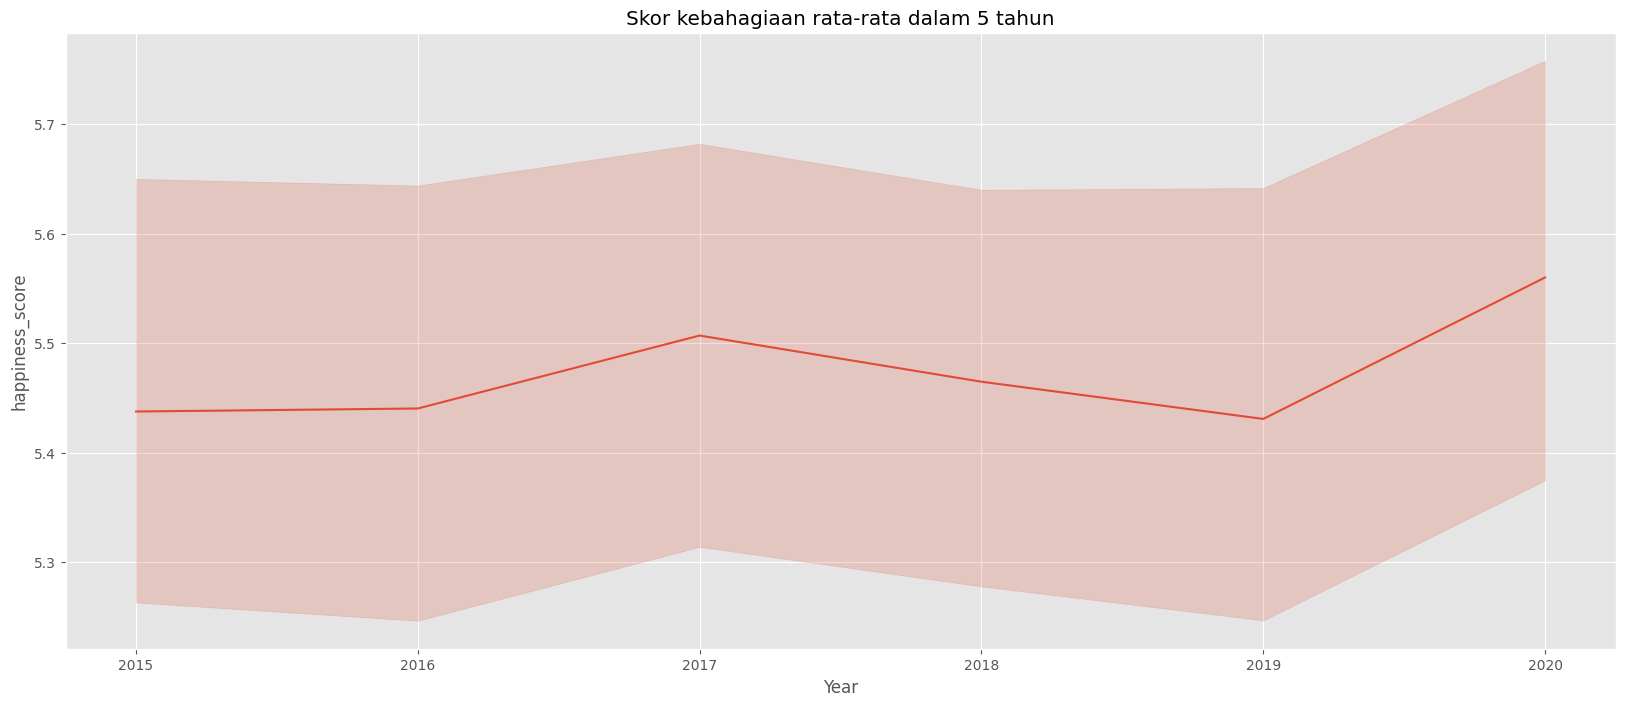

In [39]:
# Menunjukan kebahagiaan selama 5 tahun
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x="Year",y="happiness_score")
plt.title("Skor kebahagiaan rata-rata dalam 5 tahun")

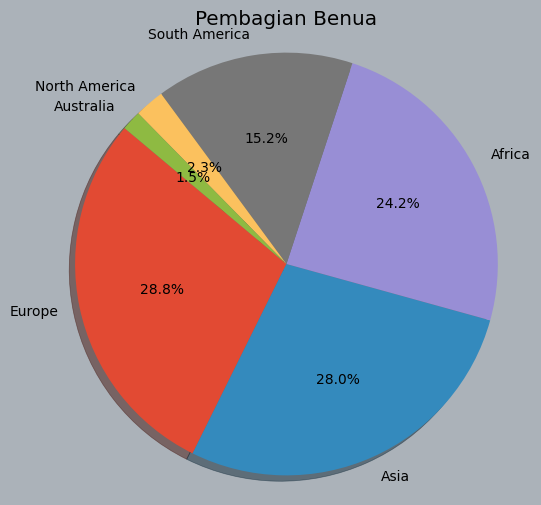

In [47]:
# Membuat diagram pie untuk distribusi benua
plt.figure(figsize=[6, 6], facecolor="#ABB2B9")
continent_counts = df["continent"].value_counts()

# Mengatur diagram pie
plt.pie(continent_counts, 
         labels=continent_counts.index,  # Menambahkan label benua
         autopct='%1.1f%%',  # Membulatkan persentase hingga 1 desimal
         shadow=True, 
         startangle=140)  # Memutar diagram agar lebih estetis

# Menambahkan judul dan label
plt.title("Pembagian Benua")
plt.axis('equal')  # Menjaga proporsi agar pie chart bulat
plt.show()


In [48]:
# grup berdasarkan benua
avg_co= df.groupby("continent")["happiness_score"].mean()
avg_co.sort_values()

continent
Africa           4.353944
Asia             5.267553
South America    5.865516
Europe           6.193717
North America    7.000539
Australia        7.289033
Name: happiness_score, dtype: float64

<Axes: xlabel='continent'>

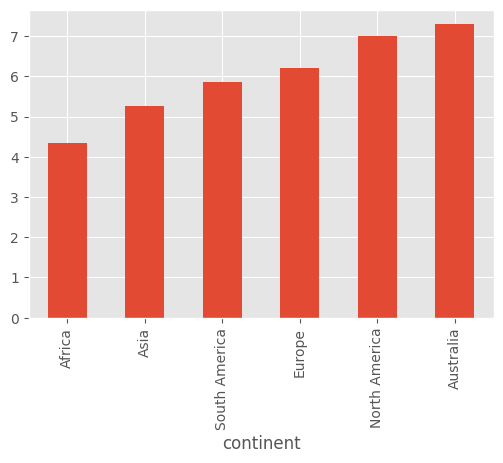

In [51]:
# kebahagiaan berdasarkan Benua
avg_co.sort_values().plot(kind="bar",figsize=(6,4))

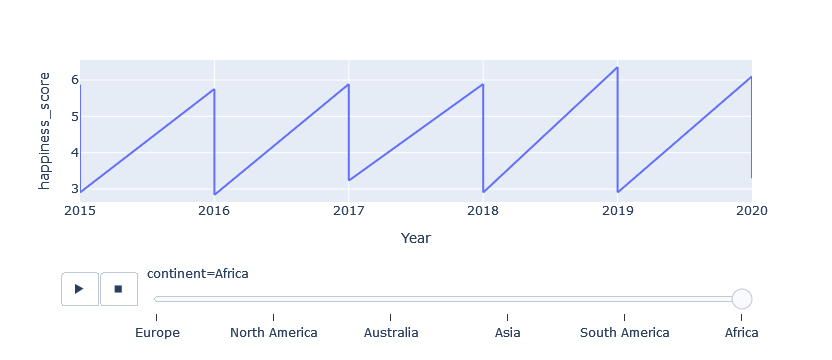

In [52]:
# grafik interaktif menggunakan #plotly
px.line(df, x="Year",y="happiness_score",animation_frame="continent")

In [58]:
# Pivot Table
piv_avg=df.pivot_table(index="continent",columns="Year",values="happiness_score")
piv_avg.round()

Year           2015  2016  2017  2018  2019  2020
continent                                        
Africa          4.0   4.0   4.0   4.0   4.0   4.0
Asia            5.0   5.0   5.0   5.0   5.0   5.0
Australia       7.0   7.0   7.0   7.0   7.0   7.0
Europe          6.0   6.0   6.0   6.0   6.0   6.0
North America   7.0   7.0   7.0   7.0   7.0   7.0
South America   6.0   6.0   6.0   6.0   6.0   6.0

<Axes: xlabel='continent'>

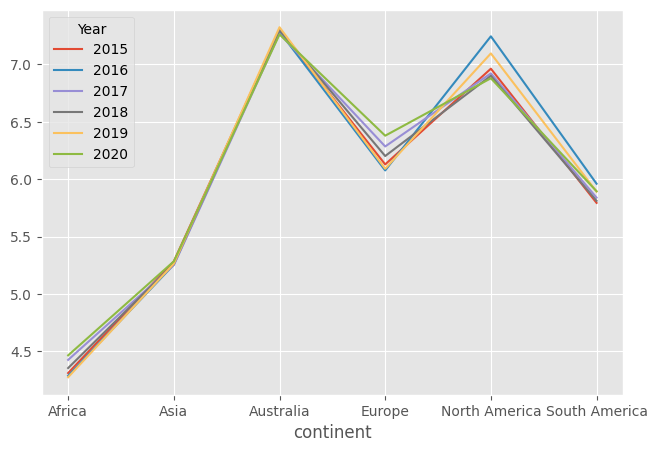

In [59]:
piv_avg.plot(figsize=(7.5,5))

In [60]:
# Membuat Pivot Table berdasarkan Negara
country_avg=df.pivot_table(index="Country",columns="Year",values="happiness_score")
country_avg.sort_values(by=2020)

Year          2015   2016   2017   2018   2019    2020
Country                                               
Afghanistan  3.794  3.575  3.203  3.632  3.360  2.5669
Zimbabwe     3.875  4.610  3.663  3.692  4.193  3.2992
Rwanda       3.471  3.465  3.334  3.408  3.515  3.3123
Tanzania     3.349  3.781  3.231  3.303  3.666  3.4762
Botswana     3.766  4.332  3.488  3.590  3.974  3.4789
...            ...    ...    ...    ...    ...     ...
Norway       7.537  7.522  7.554  7.594  7.498  7.4880
Iceland      7.504  7.561  7.494  7.495  7.501  7.5045
Switzerland  7.494  7.587  7.480  7.487  7.509  7.5599
Denmark      7.522  7.527  7.600  7.555  7.526  7.6456
Finland      7.469  7.406  7.769  7.632  7.413  7.8087

[132 rows x 6 columns]

In [61]:
# Membuat filter tabel berdasarkan benua 

africa= df[df["continent"]=="Africa"]
asia= df[df["continent"]=="Asia"]
australia= df[df["continent"]=="Australia"]
europe= df[df["continent"]=="Europe"]
north_a= df[df["continent"]=="North America"]
south_a= df[df["continent"]=="South America"]

In [62]:
 # Membuat pivot table Benua Asia
asia_p=asia.pivot_table(index="Country",columns="Year",values="happiness_score")
asia_p.sort_values(by=2015)

Year                   2015   2016   2017   2018   2019    2020
Country                                                        
Yemen                 3.593  4.077  3.380  3.355  3.724  3.5274
Afghanistan           3.794  3.575  3.203  3.632  3.360  2.5669
Cambodia              4.168  3.819  4.700  4.433  3.907  4.8484
Georgia               4.286  4.297  4.519  4.340  4.252  4.6726
India                 4.315  4.565  4.015  4.190  4.404  3.5733
Armenia               4.376  4.350  4.559  4.321  4.360  4.6768
Sri Lanka             4.440  4.271  4.366  4.471  4.415  4.3270
Iraq                  4.497  4.677  4.437  4.456  4.575  4.7848
Myanmar               4.545  4.307  4.360  4.308  4.395  4.3080
Bangladesh            4.608  4.694  4.456  4.500  4.643  4.8328
Iran                  4.692  4.686  4.548  4.707  4.813  4.6724
Mongolia              4.955  4.874  5.285  5.125  4.907  5.4562
Nepal                 4.962  4.514  4.913  4.880  4.793  5.1372
Kyrgyzstan            5.004  5.286  5.261  5.131  5.185  5.5415
Tajikistan            5.041  4.786  5.467  5.199  4.996  5.5557
Vietnam               5.074  5.360  5.175  5.103  5.061  5.3535
Lebanon               5.225  4.839  5.197  5.358  5.129  4.7715
Azerbaijan            5.234  5.212  5.208  5.201  5.291  5.1648
Indonesia             5.262  5.399  5.192  5.093  5.314  5.2856
Pakistan              5.269  5.194  5.653  5.472  5.132  5.6933
China                 5.273  5.140  5.191  5.246  5.245  5.1239
Jordan                5.336  5.192  4.906  5.161  5.303  4.6334
Philippines           5.430  5.073  5.631  5.524  5.279  6.0060
Turkey                5.500  5.332  5.373  5.483  5.389  5.1318
Cyprus                5.621  5.689  6.046  5.762  5.546  6.1590
Kazakhstan            5.819  5.855  5.809  5.790  5.919  6.0579
Turkmenistan          5.822  5.548  5.247  5.636  5.658  5.1191
Japan                 5.920  5.987  5.886  5.915  5.921  5.8708
Uzbekistan            5.971  6.003  6.174  6.096  5.987  6.2576
Malaysia              6.084  5.770  5.339  6.322  6.005  5.3843
Bahrain               6.087  5.960  6.199  6.105  6.218  6.2273
Kuwait                6.105  6.295  6.021  6.083  6.239  6.1021
Saudi Arabia          6.344  6.411  6.375  6.371  6.379  6.4065
Thailand              6.424  6.455  6.008  6.072  6.474  5.9988
Singapore             6.572  6.798  6.262  6.343  6.739  6.3771
United Arab Emirates  6.648  6.901  6.825  6.774  6.573  6.7908
Israel                7.213  7.278  7.139  6.814  7.267  7.1286

<Axes: xlabel='Country'>

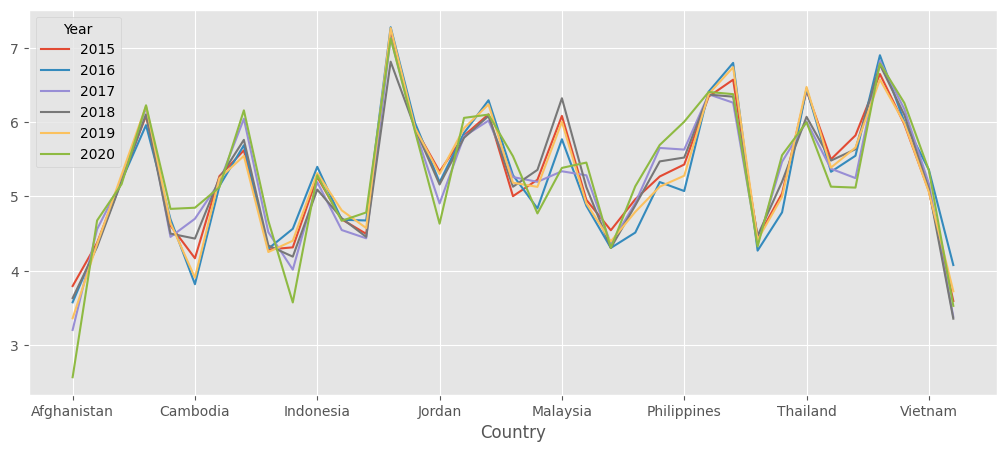

In [64]:
asia_p.plot(figsize=(12.5,5))

In [65]:
 # Membuat pivot table Benua Australia
australia_P=australia.pivot_table(index="Country",columns="Year",values="happiness_score")
australia_P.sort_values(by=2015)

Year          2015   2016   2017   2018   2019    2020
Country                                               
Australia    7.284  7.284  7.228  7.272  7.313  7.2228
New Zealand  7.314  7.286  7.307  7.324  7.334  7.2996

<Axes: xlabel='Country'>

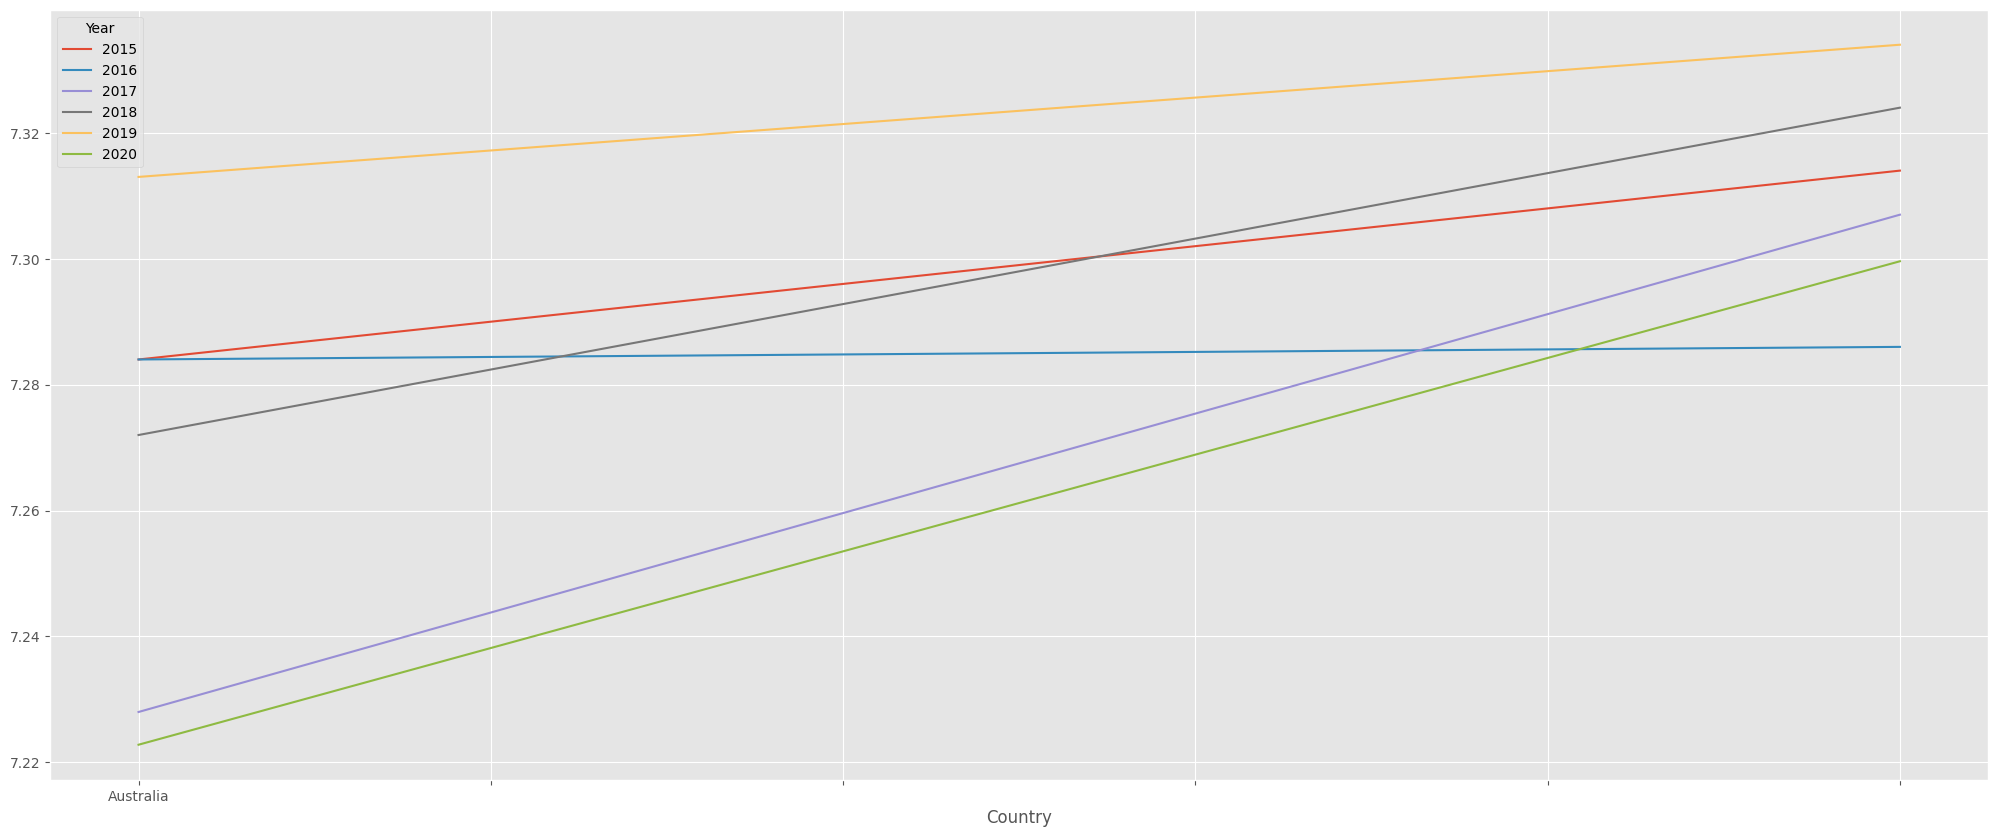

In [67]:
australia_P.plot(figsize=(25,10))

In [68]:
 # Membuat pivot table Benua Amerika Selatan
south_a_p=south_a.pivot_table(index="Country",columns="Year",values="happiness_score")
south_a_p.sort_values(by=2015)


Year                 2015   2016   2017   2018   2019    2020
Country                                                      
Guinea              3.507  3.656  4.534  3.964  3.607  4.9493
Haiti               3.603  4.518  3.597  3.582  4.028  3.7208
Honduras            5.181  4.788  5.860  5.504  4.871  5.9532
Dominican Republic  5.230  4.885  5.425  5.302  5.155  5.6892
Venezuela           5.250  6.810  4.707  4.806  6.084  5.0532
Jamaica             5.311  5.709  5.890  5.890  5.510  5.8898
Paraguay            5.493  5.878  5.743  5.681  5.538  5.6921
Peru                5.715  5.824  5.697  5.663  5.743  5.7968
Bolivia             5.823  5.890  5.779  5.752  5.822  5.7475
El Salvador         6.003  6.130  6.253  6.167  6.068  6.3483
Ecuador             6.008  5.975  6.028  5.973  5.976  5.9252
Nicaragua           6.071  5.828  6.105  6.141  5.992  6.1371
Colombia            6.357  6.477  6.125  6.260  6.481  6.1634
Panama              6.452  6.786  6.321  6.430  6.701  6.3048
Uruguay             6.454  6.485  6.293  6.379  6.545  6.4401
Guatemala           6.454  6.123  6.436  6.382  6.324  6.3989
Argentina           6.599  6.574  6.086  6.388  6.650  5.9747
Brazil              6.635  6.983  6.300  6.419  6.952  6.3756
Chile               6.652  6.670  6.444  6.476  6.705  6.2285
Costa Rica          7.079  7.226  7.167  7.072  7.087  7.1214

<Axes: xlabel='Country'>

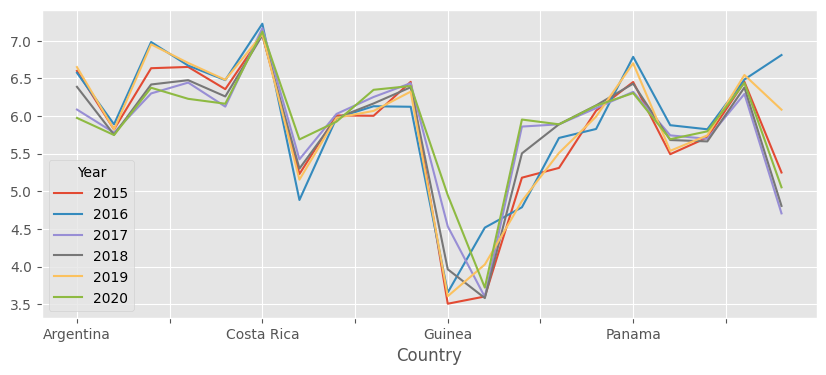

In [69]:
south_a_p.plot(figsize=(10,4))

In [70]:
 # Membuat pivot table Benua Amerika Utara
north_a_p=north_a.pivot_table(index="Country",columns="Year",values="happiness_score")
north_a_p.sort_values(by=2015)

Year            2015   2016   2017   2018   2019    2020
Country                                                 
Mexico         6.578  7.187  6.595  6.488  6.778  6.4650
United States  6.993  7.119  6.892  6.886  7.104  6.9396
Canada         7.316  7.427  7.278  7.328  7.404  7.2321

<Axes: xlabel='Country'>

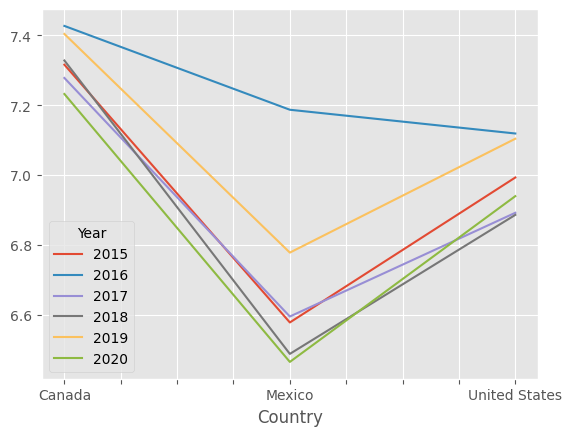

In [71]:
north_a_p.plot()

In [72]:
 # Membuat pivot table Benua Eropa
europe_p=europe.pivot_table(index="Country",columns="Year",values="happiness_score")
europe_p.sort_values(by=2015)

Year                     2015   2016   2017   2018   2019    2020
Country                                                          
Ukraine                 4.096  4.681  4.332  4.103  4.324  4.5607
Albania                 4.644  4.959  4.719  4.586  4.655  4.8827
Bulgaria                4.714  4.218  5.011  4.933  4.217  5.1015
Bosnia and Herzegovina  5.182  4.949  5.386  5.129  5.163  5.6741
Portugal                5.195  5.102  5.693  5.410  5.123  5.9109
Greece                  5.227  4.857  5.287  5.358  5.033  5.5150
Montenegro              5.237  5.192  5.523  5.347  5.161  5.5461
Kosovo                  5.279  5.589  6.100  5.662  5.401  6.3252
Croatia                 5.293  5.759  5.432  5.321  5.488  5.5047
Hungary                 5.324  4.800  5.758  5.620  5.145  6.0004
Serbia                  5.395  5.123  5.603  5.398  5.177  5.7782
Belarus                 5.569  5.813  5.323  5.483  5.802  5.5399
Estonia                 5.611  5.429  5.893  5.739  5.517  6.0218
Slovenia                5.758  5.848  6.118  5.948  5.768  6.3634
Romania                 5.825  5.124  6.070  5.945  5.528  6.1237
Moldova                 5.838  5.889  5.529  5.640  5.897  5.6075
Latvia                  5.850  5.098  5.940  5.933  5.560  5.9500
Lithuania               5.902  5.833  6.149  5.952  5.813  6.2155
Russia                  5.963  5.716  5.648  5.810  5.856  5.5460
Italy                   5.964  5.948  6.223  6.000  5.977  6.3874
Poland                  5.973  5.791  6.182  6.123  5.835  6.1863
Slovakia                6.098  5.995  6.198  6.173  6.078  6.2806
Spain                   6.403  6.329  6.354  6.310  6.361  6.4009
France                  6.442  6.575  6.592  6.489  6.478  6.6638
Malta                   6.527  6.302  6.726  6.627  6.488  6.7728
United Kingdom          6.714  6.867  7.054  7.190  6.725  7.1645
Luxembourg              6.863  6.946  7.090  6.910  6.871  7.2375
Belgium                 6.891  6.937  6.923  6.927  6.929  6.8635
Germany                 6.951  6.750  6.985  6.965  6.994  7.0758
Ireland                 6.977  6.940  7.021  6.977  6.907  7.0937
Austria                 7.006  7.200  7.246  7.139  7.119  7.2942
Sweden                  7.284  7.364  7.343  7.314  7.291  7.3535
Netherlands             7.377  7.378  7.488  7.441  7.339  7.4489
Finland                 7.469  7.406  7.769  7.632  7.413  7.8087
Switzerland             7.494  7.587  7.480  7.487  7.509  7.5599
Iceland                 7.504  7.561  7.494  7.495  7.501  7.5045
Denmark                 7.522  7.527  7.600  7.555  7.526  7.6456
Norway                  7.537  7.522  7.554  7.594  7.498  7.4880

<Axes: xlabel='Country'>

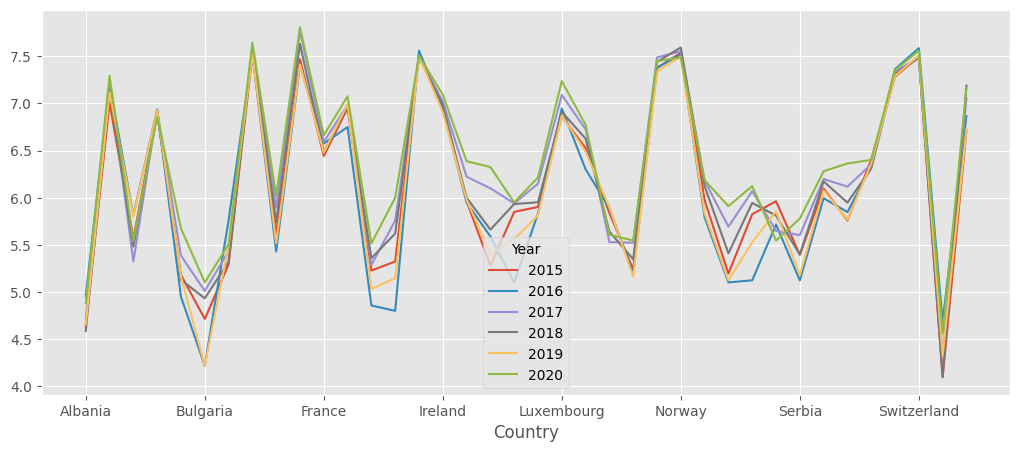

In [73]:
europe_p.plot(figsize=(12.5,5))

In [74]:
 # Membuat pivot table Benua Afrika
africa_p=africa.pivot_table(index="Country",columns="Year",values="happiness_score")
africa_p.sort_values(by=2015)

Year           2015   2016   2017   2018   2019    2020
Country                                                
Burundi       2.905  2.905  3.775  2.905  2.905  3.7753
Tanzania      3.349  3.781  3.231  3.303  3.666  3.4762
Rwanda        3.471  3.465  3.334  3.408  3.515  3.3123
Togo          3.495  2.839  4.085  3.999  3.303  4.1872
Liberia       3.533  4.571  3.975  3.495  3.622  4.5579
Madagascar    3.644  3.681  3.933  3.774  3.695  4.1656
Benin         3.657  3.340  4.883  4.141  3.484  5.2160
Botswana      3.766  4.332  3.488  3.590  3.974  3.4789
Zimbabwe      3.875  4.610  3.663  3.692  4.193  3.2992
Chad          3.936  3.667  4.350  4.301  3.763  4.4227
Malawi        3.970  4.292  3.410  3.587  4.156  3.5380
Niger         4.028  3.845  4.628  4.166  3.856  4.9096
Burkina Faso  4.032  3.587  4.587  4.424  3.739  4.7687
Uganda        4.081  3.931  4.189  4.161  3.739  4.4320
Ghana         4.120  4.633  4.996  4.657  4.276  5.1480
Mali          4.190  3.995  4.390  4.447  4.073  4.7293
Mauritania    4.292  4.436  4.490  4.356  4.201  4.3746
Ethiopia      4.460  4.512  4.286  4.350  4.508  4.1862
Gabon         4.465  3.896  4.799  4.758  4.121  4.8293
Zambia        4.514  5.129  4.107  4.377  4.795  3.7594
Senegal       4.535  3.904  4.681  4.631  4.219  4.9808
Kenya         4.553  4.419  4.509  4.410  4.356  4.5830
Cameroon      4.695  4.252  5.044  4.975  4.513  5.0849
Sierra Leone  4.709  4.507  4.374  4.571  4.635  3.9264
Egypt         4.735  4.194  4.166  4.419  4.362  4.1514
Tunisia       4.805  4.739  4.461  4.592  5.045  4.3922
South Africa  4.829  4.642  4.722  4.724  4.459  4.8141
Nigeria       5.074  5.268  5.265  5.155  4.875  4.7241
Morocco       5.235  5.013  5.208  5.254  5.151  5.0948
Libya         5.525  5.754  5.525  5.566  5.615  5.4888
Mauritius     5.629  5.477  5.888  5.891  5.648  6.1013
Algeria       5.872  5.605  5.211  5.295  6.355  5.0051

<Axes: xlabel='Country'>

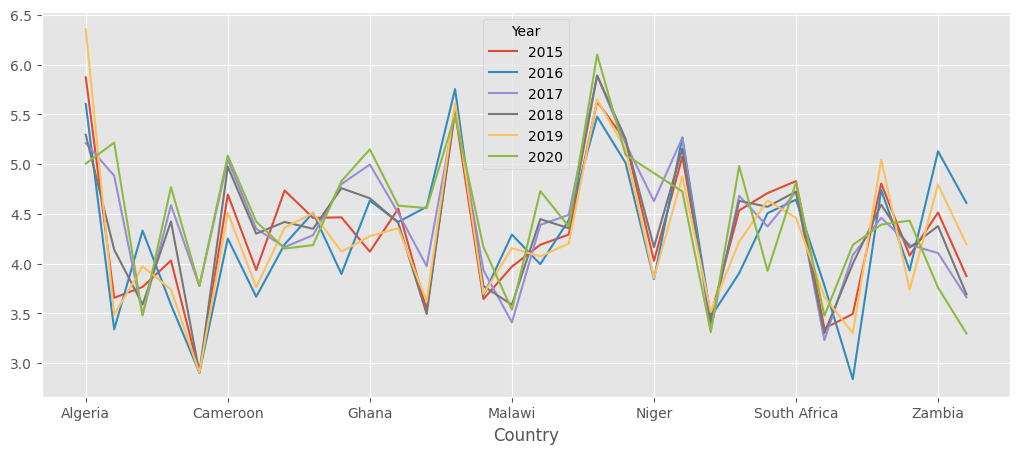

In [75]:
africa_p.plot(figsize=(12.5,5))